<a href="https://colab.research.google.com/github/VladMarianciuc/Mathematical-Modelling/blob/main/MMSM2_Tema_Bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [573]:
# Problema de încovoiere a unei bare încastrate. Marianciuc Vlad grupa 322

import sympy as sm
a, b, h, l, rho, x1, x2, x3, nu, E, P, I = sm.symbols("a, b, h, l, rho, x1, x2, x3, nu, E, P, I", real = True)

def afisare_mesaj(mesaj):
    chenar = '-'
    linie = len(mesaj) * chenar
    print(linie)
    print(mesaj)
    print(linie)


F=(3*a)/4 * (-h**2+4*x2**2)

# 1)
tn_x1_zero = sm.Matrix([[0], [F], [0]])
# sm.pprint(tn)

fc = sm.Matrix([[0], [sm.integrate(sm.integrate(tn_x1_zero[1], (x2, -h/2, h/2)), (x3, -b/2, b/2))], [0]])

fc = fc.subs({a:2*P/(b*h**3)})
print('1)', end=" ")
sm.pprint(f'fc = {fc}')

1) fc = Matrix([[0], [-P], [0]])


In [574]:
# 2)

T = P/(2*I)*sm.Matrix([[2*x1*x2, h**2/4 - x2**2, 0],
                       [h**2/4 - x2**2, 0, 0],
                       [0, 0, 2*nu*x1*x2]])
# sm.pprint(T)

divT = sm.Matrix([[sm.diff(T[0,0], x1) + sm.diff(T[0,1],x2) + sm.diff(T[0, 2], x3)],
                  [sm.diff(T[1,0], x1) + sm.diff(T[1,1],x2) + sm.diff(T[1, 2], x3)],
                  [sm.diff(T[2,0], x1) + sm.diff(T[2,1],x2) + sm.diff(T[2, 2], x3)]])
print('\n2)', end=" ")
sm.pprint(f'divT = {divT}') # nu avem forte de volum, deci ec de echilibru echivalent divT = 0


2) divT = Matrix([[0], [0], [0]])


In [575]:
# 3)

Tn_x2 = T@sm.Matrix([[0],
             [1],
             [0]])
Tn_x2_sus = Tn_x2.subs({x2:h/2})
Tn_x2_jos = Tn_x2.subs({x2:-h/2})
print('\n3)', end=" ")
sm.pprint(f'Tn_x2_sus = {Tn_x2_sus}')
sm.pprint(f'   Tn_x2_jos = {Tn_x2_jos}')

Tn_x1 = T@sm.Matrix([[-1],
                     [0],
                     [0]])
Tn_x1_zero = sm.simplify(Tn_x1.subs({x1:0, P:(a*b*h**3)/2, I:(b*h**3)/12}))
print(f'   Tn_x1_zero verifica conditia initiala? ', end=" ")
sm.pprint(Tn_x1_zero == tn_x1_zero)
print('\n')
sm.pprint(Tn_x1_zero)


3) Tn_x2_sus = Matrix([[0], [0], [0]])
   Tn_x2_jos = Matrix([[0], [0], [0]])
   Tn_x1_zero verifica conditia initiala?  True


⎡        0         ⎤
⎢                  ⎥
⎢    ⎛   2       2⎞⎥
⎢3⋅a⋅⎝- h  + 4⋅x₂ ⎠⎥
⎢──────────────────⎥
⎢        4         ⎥
⎢                  ⎥
⎣        0         ⎦


In [576]:
# 4)

print('\n4)  [eps] = \n')
eps = (1-nu)/E *T - nu/E * (T[0,0]+T[1,1]+T[2,2]) * sm.eye(3)
eps = sm.simplify(eps)
sm.pprint(eps)


4)  [eps] = 

⎡                                 ⎛ 2       2⎞                         ⎤
⎢P⋅x₁⋅x₂⋅(-ν⋅(ν + 1) - ν + 1)  -P⋅⎝h  - 4⋅x₂ ⎠⋅(ν - 1)                 ⎥
⎢────────────────────────────  ────────────────────────        0       ⎥
⎢            E⋅I                        8⋅E⋅I                          ⎥
⎢                                                                      ⎥
⎢     ⎛ 2       2⎞                                                     ⎥
⎢  -P⋅⎝h  - 4⋅x₂ ⎠⋅(ν - 1)       -P⋅ν⋅x₁⋅x₂⋅(ν + 1)                    ⎥
⎢  ────────────────────────      ───────────────────           0       ⎥
⎢           8⋅E⋅I                        E⋅I                           ⎥
⎢                                                                      ⎥
⎢                                                              2       ⎥
⎢                                                        -2⋅P⋅ν ⋅x₁⋅x₂ ⎥
⎢             0                           0              ──────────────⎥
⎣                                   

In [577]:
# 5)

f = sm.Function("f")
g = sm.Function("g")

u1 = sm.integrate(eps[0, 0], x1)+f(x2)
u2 = sm.integrate(eps[1, 1], x2)+g(x1)

print('\n5)  u1(x1, x2), u2(x1, x2) :\n')
sm.pprint(u1)
sm.pprint(u2)


5)  u1(x1, x2), u2(x1, x2) :

          2 ⎛     2                     ⎞
        x₁ ⋅⎝- P⋅ν ⋅x₂ - 2⋅P⋅ν⋅x₂ + P⋅x₂⎠
f(x₂) + ─────────────────────────────────
                      2⋅E⋅I              
          2 ⎛     2            ⎞
        x₂ ⋅⎝- P⋅ν ⋅x₁ - P⋅ν⋅x₁⎠
g(x₁) + ────────────────────────
                 2⋅E⋅I          


In [578]:
# 6)

print('\n6)', end=" ")
# componentele vectorului de deplasare verifică ecuația eps12 = 1/2(du1/dx2 + du2/dx1)

expr = sm.diff(u1, x2) + sm.diff(u2, x1) - 2*eps[0,1]  #du1/dx2 + du2/dx1 - 2 eps12
expr = sm.expand(expr)
# sm.pprint(expr)

termx2, termx1 = expr.as_independent(x1, as_Add=True)
termx2 = sm.simplify(termx2)
termx1 = sm.simplify(termx1)
# sm.pprint(termx2)
# sm.pprint(termx1)

K, c1, c2 = sm.symbols('K,c1,c2')

# Cum termx2 = -termx1 = K, in urma rezolvarii celor doua ecuatii determinam f'(x2) si g'(x1)

dfx2 = sm.solve(termx2 - K, sm.diff(f(x2), x2))
dgx1 = sm.solve(-termx1 - K, sm.diff(g(x1), x1))
# sm.pprint(dfx2)
# sm.pprint(dgx1)

fx2 = sm.integrate(dfx2[0], x2) + c2
gx1 = sm.integrate(dgx1[0], x1) + c1
# sm.pprint(fx2)
# sm.pprint(gx1)

u1 = u1.subs(f(x2), fx2)
u2 = u2.subs(g(x1), gx1)
diff_u2_x1 = sm.diff(u2, x1)
# sm.pprint(u1)
# sm.pprint(u2)
# sm.pprint(diff_u2_x1)

sol = sm.solve([u1.subs([(x1, l), (x2, 0)]), u2.subs([(x1, l), (x2, 0)]), diff_u2_x1.subs([(x1, l), (x2, 0)])], [K, c1, c2])
# sm.pprint(sol)
Ksol= sol[K]
c1sol = sol[c1]
c2sol = sol[c2]
print('Constantele de integrare sunt:\n')
sm.pprint(sol)

u1 = sm.simplify(u1.subs([(K, Ksol), (c2, c2sol), (I, (b*h**3)/12)]))
u2 = sm.simplify(u2.subs([(K, Ksol), (c1, c1sol), (I, (b*h**3)/12)]))
# print('\t u1(x1, x2) = \n\n')
# sm.pprint(u1)
# print('\n\n\n\t u2(x1, x2) = \n\n')
# sm.pprint(u2)


6) Constantele de integrare sunt:

⎧      2  2        2        2         3  2        3        3       ⎫
⎪   P⋅l ⋅ν  + 2⋅P⋅l ⋅ν - P⋅l       P⋅l ⋅ν  + 2⋅P⋅l ⋅ν - P⋅l        ⎪
⎨K: ─────────────────────────, c₁: ─────────────────────────, c₂: 0⎬
⎪             2⋅E⋅I                          3⋅E⋅I                 ⎪
⎩                                                                  ⎭



7)


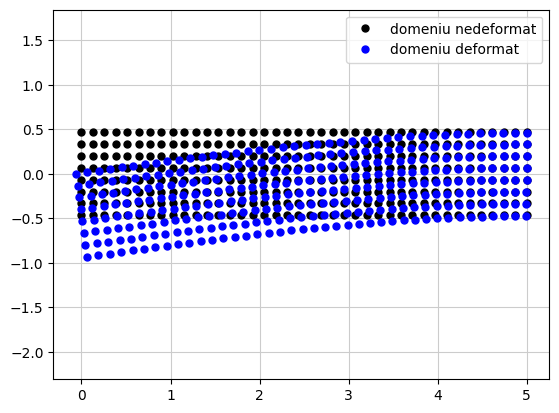

In [579]:
# 7)

print('\n7)')

u1 = u1.subs([(E, 2.1 * 10**11),(nu,0.3),(l,5),(b,1),(h,1),(P,10**6)])
u2 = u2.subs([(E, 2.1 * 10**11),(nu,0.3),(l,5),(b,1),(h,1),(P,10**6)])
# sm.pprint(u1)
# sm.pprint(u2)

import numpy as np
u1 = sm.lambdify([x1,x2], u1, "numpy")
u2 = sm.lambdify([x1,x2], u2, "numpy")

h = 1
l = 5
x = np.linspace(0,l,40)
y = np.linspace(-h,h,16)
x,y = np.meshgrid(x,y)
contor = 0
X1 = []
X2 = []
X1new = []
X2new = []
U1 = []
U2 = []
fact_scala = 10**2.8
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      if(y[i, j]<=1/2 and y[i, j]>=-1/2):
	    #Adaugam elementul xij la lista X1
          X1.append(x[i,j])
      #Adaugam elementul Yij la lista X2
          X2.append(y[i,j])
      # Calculul deplasărilor în punctele din domeniul triunghiular si le adaugam la U1, resectiv U2
          U1.append(u1(x[i,j], y[i,j]))
          U2.append(u2(x[i,j], y[i,j]))
      # Calculul coordonatelor punctelor deplasate (xij + fact_scala * u1) si le adaugam la lista X1new
          X1new.append(x[i,j] + fact_scala * U1[contor])
      # Calculul coordonatelor punctelor deplasate (yij + fact_scala * u2) si le adaugam la lista X2new
          X2new.append(y[i,j] + fact_scala * U2[contor])
          contor = contor + 1

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.axis('equal')
# Graficul domeniului nedeformat
ax.plot(X1, X2, linestyle='None',marker = '.',markersize = 10, markerfacecolor = 'k', markeredgecolor = "k", label='domeniu nedeformat')

# Graficul domeniului deformat
ax.plot(X1new, X2new, linestyle='None',marker = '.',markersize = 10, markerfacecolor = 'b', markeredgecolor = "b", label = 'domeniu deformat')

ax.legend(loc='best')

ax.grid(True, color='0.8')
# ax.set_title('Domeniul nedeformat, respectiv deformat')